## Informasi Mahasiswa

Nama:Sofia

NPM : 2108107010006

# SVM Regression

## Dataset

### Real Estate Valuation

Pada tugas 2 ini, saya menggunakan dataset Real Estate Valuation dari sumber [UCI Edu](https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set). Dataset ini diambil dari data historis pasar penilaian real estat yang dikumpulkan dari Distrik Sindian, New Taipei City, Taiwan.

Dataset ini berisi fitur-fitur berikut:
- X1 transaction date = tanggal transaksi
- X2 house age = usia rumah (satuan: tahun)
- X3 distance to the nearest MRT station = jarak ke stasiun MRT terdekat (unit: meter)
- X4 number of convenience stores = jumlah toko serba ada di sekitar tempat tinggal yang dapat ditempuh dengan berjalan kaki
- X5 latitude = koordinat geografis, garis lintang. (satuan: derajat)
- X6 longtitude = koordinat geografis, bujur. (satuan: derajat)

Dataset ini memiliki label yaitu:
- Y house price of unit area = harga rumah per satuan luas

Terdapat 414 data untuk tiap fitur

## Acessing Data

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [2]:
df = pd.read_excel('UCI_Real_Estate_Valuation.xlsx', sheet_name='Sheet1', index_col='No')

## Preprocessing Data

In [3]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


Melakukan rename untuk tiap kolom agar lebih rapi dan mudah dipahami

In [4]:
df.rename(columns={
    "X1 transaction date": "Transaction_Date", 
    "X2 house age": "House_Age", 
    "X3 distance to the nearest MRT station": "Distance",
    "X4 number of convenience stores": "Num_Stores_NearBy",
    "X5 latitude": "Latitude",
    "X6 longitude": "Longitude",
    "Y house price of unit area": "Target",
}, inplace=True)

In [5]:
df.shape

(414, 7)

In [6]:
df.describe()

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Mengecek missing value pada dataset

In [7]:
df.isna().sum()

Transaction_Date     0
House_Age            0
Distance             0
Num_Stores_NearBy    0
Latitude             0
Longitude            0
Target               0
dtype: int64

Mengecek data duplicate

In [8]:
df.duplicated().sum()

0

Melihat korelasi antar tiap kolom

In [9]:
df.corr()

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
Transaction_Date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
House_Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Distance,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
Num_Stores_NearBy,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Target,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


Melihat korelasi absolut antara kolom-kolom pada dataframe dengan kolom target(label) dan diurutkan secara menurun untuk melihat korelasi terbesar

In [10]:
abs(df.corr())['Target'].sort_values(ascending=False)

Target               1.000000
Distance             0.673613
Num_Stores_NearBy    0.571005
Latitude             0.546307
Longitude            0.523287
House_Age            0.210567
Transaction_Date     0.087529
Name: Target, dtype: float64

Terlihat korelasi yang paling kuat dengan target adalah distance(jarak). Untuk itu dilakukan visualisasi korelasi dengan menggunakan scatterplot

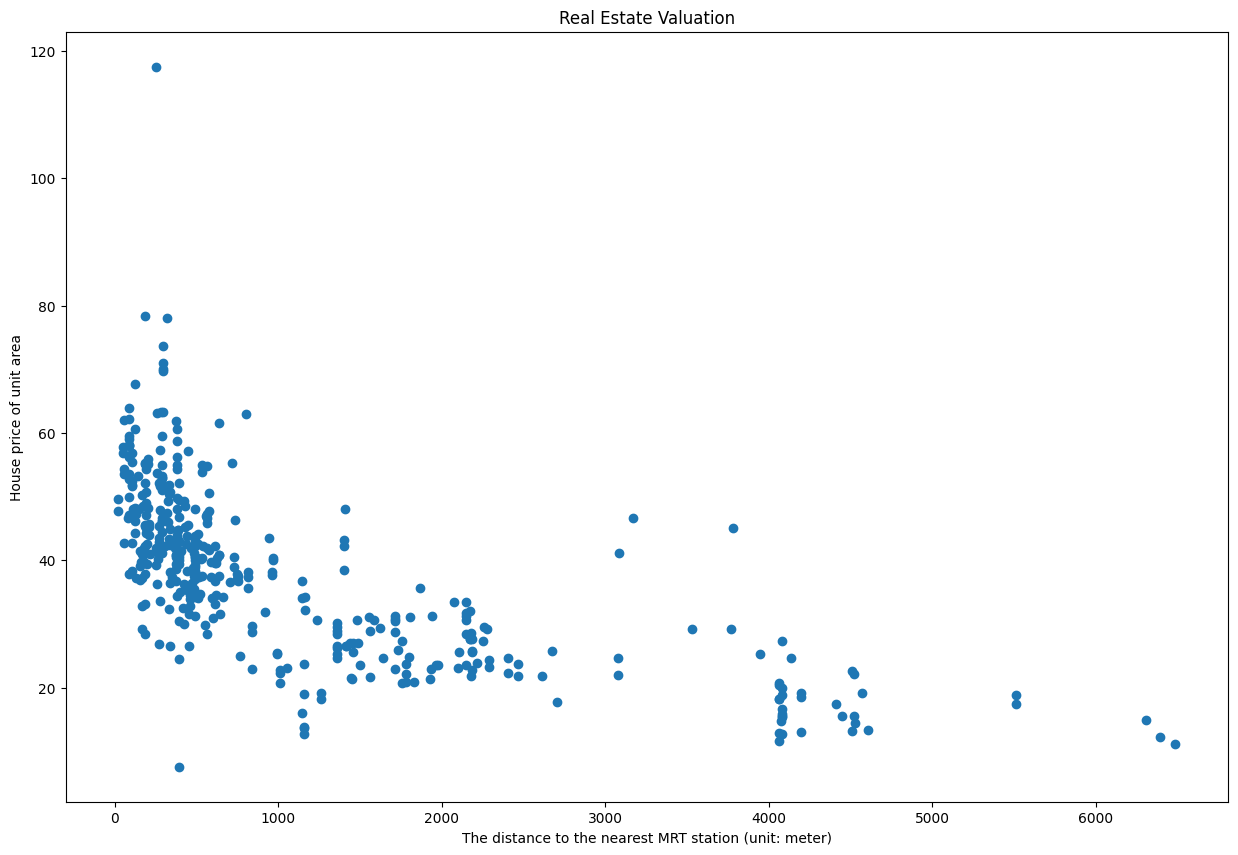

In [11]:
plt.figure(figsize=(15,10))
plt.scatter(x=df['Distance'], y=df['Target'])
plt.xlabel('The distance to the nearest MRT station (unit: meter)')
plt.ylabel('House price of unit area')
plt.title('Real Estate Valuation')
plt.show()

Melakukan pengecekan outlier dengan visualisasi boxplot untuk Distance dan Target

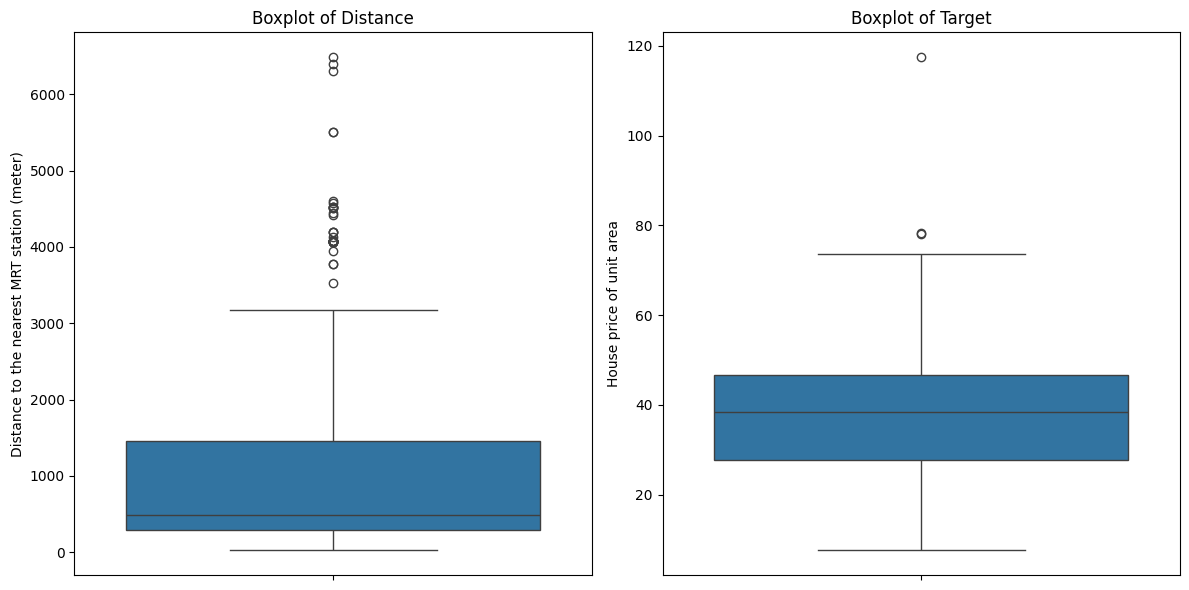

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(y=df['Distance'], ax=axes[0])
axes[0].set_title('Boxplot of Distance')
axes[0].set_ylabel('Distance to the nearest MRT station (meter)')

sns.boxplot(y=df['Target'], ax=axes[1])
axes[1].set_title('Boxplot of Target')
axes[1].set_ylabel('House price of unit area')

plt.tight_layout()
plt.show()

Terlihat dari boxplot tersebut fitur Distance memiliki outlier, sehingga perlu dilakukan penghapusan dengan menggunakan rumus IQR untuk menentukan lower bound dan upper bound sehingga model akan lebih bagus performanya.

In [13]:
Q1 = df['Distance'].quantile(0.25)
Q3 = df['Distance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['Distance'] >= lower_bound) & (df['Distance'] <= upper_bound)]

Melakukan pengecekan visualisasi dengan boxplot setelah outlier pada Distance telah dihapus.

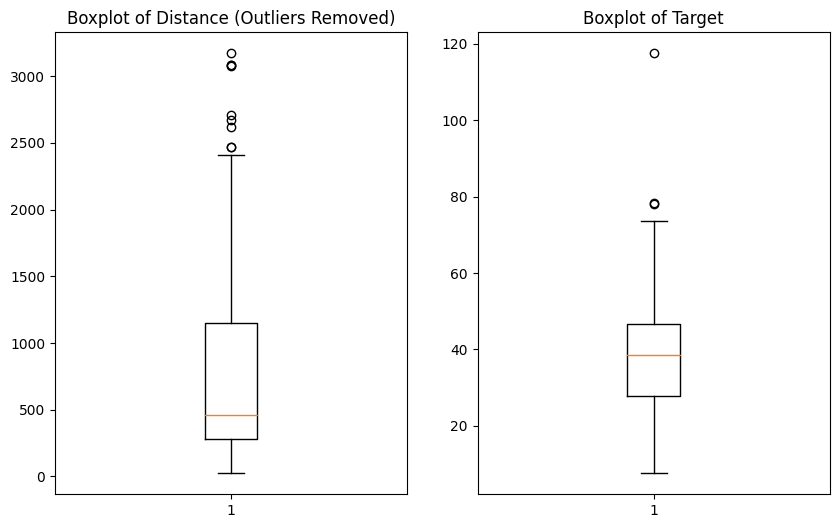

In [14]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_filtered['Distance'])
plt.title('Boxplot of Distance (Outliers Removed)')

plt.subplot(1, 2, 2)
plt.boxplot(df['Target'])
plt.title('Boxplot of Target')
plt.show()

Variabel independen \( X \) dibuat dari DataFrame \( df\_filtered \) dengan hanya memilih kolom "Distance". Variabel dependen \( y \) dipilih dari kolom "Target" dari DataFrame \( df\_filtered \) dan disimpan dalam variabel \( y \). Dengan demikian, variabel \( X \) akan berisi fitur tunggal "Distance", sedangkan variabel \( y \) akan berisi target yang akan diprediksi.

In [15]:
X = df_filtered[['Distance']]
y = df_filtered['Target']

## Membangun Model SVR

Melakukan pembagian dataset menjadi dua bagian, yaitu data training dan testing. Nantinya X_train dan y_train akan digunakan untuk melatih model, dan X_test serta y_test untuk menguji kinerja model pada data yang belum pernah dilihat sebelumnya

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

Melakukan penskalaan fitur pada data X_train dan X_test

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Mengimplementasi Grid Search Cross Validation untuk menemukan parameter terbaik untuk model SVR dengan kernel RBF. Parameter yang ditelusuri adalah \( C \) (regularization parameter) dan \( \epsilon \) (tolerance parameter). Model SVR dengan setiap kombinasi parameter diuji menggunakan validasi silang \( k \)-fold dengan skor evaluasi berupa mean absolute error yang diambil negatif. Sehingga hasilnya adalah model SVR dengan parameter terbaik yang ditemukan.

In [28]:
param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]},
             scoring='neg_mean_absolute_error')

Menyimpan model SVR dengan parameter terbaik yang ditemukan selama proses grid search cross validation ke dalam variabel best_svr.

In [29]:
best_svr = grid_search.best_estimator_

Membuat prediksi menggunakan model SVR terbaik (best_svr) pada data uji yang telah diubah skala (X_test_scaled).

In [25]:
y_pred = best_svr.predict(X_test_scaled)

Menghitung mean absolute error (MAE) antara nilai aktual (y_test) dan nilai yang diprediksi (y_pred) yang mengukur rata-rata dari selisih absolut antara setiap prediksi dan nilai yang sebenarnya.

In [26]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 5.939905474046013


## Visualisasi Data

Membangun visualisasi yang membandingkan nilai aktual (biru) dan nilai yang diprediksi oleh model SVR (merah) untuk harga unit area rumah berdasarkan jarak ke stasiun MRT terdekat. Semakin dekat titik merah ke titik biru, semakin baik model memprediksi nilai target sesuai dengan nilai aktualnya.

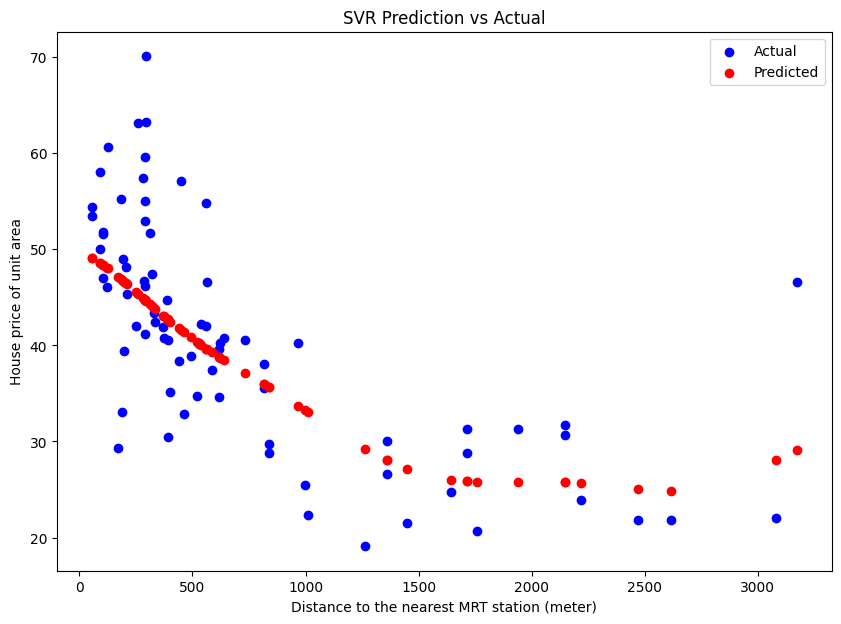

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Distance to the nearest MRT station (meter)')
plt.ylabel('House price of unit area')
plt.title('SVR Prediction vs Actual')
plt.legend()
plt.show()

Visualisasi ini menunjukkan garis hyperplane (hijau) yang dihasilkan oleh model SVR, serta titik prediksi (merah) dan titik aktual (biru). Garis hyperplane merupakan representasi dari fungsi prediksi model terhadap rentang data yang diuji (X_range), sedangkan titik merah dan biru menunjukkan nilai yang diprediksi dan aktual pada data uji. Semakin dekat titik merah dan biru, semakin baik model memprediksi nilai target.

c:\Users\sofia\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


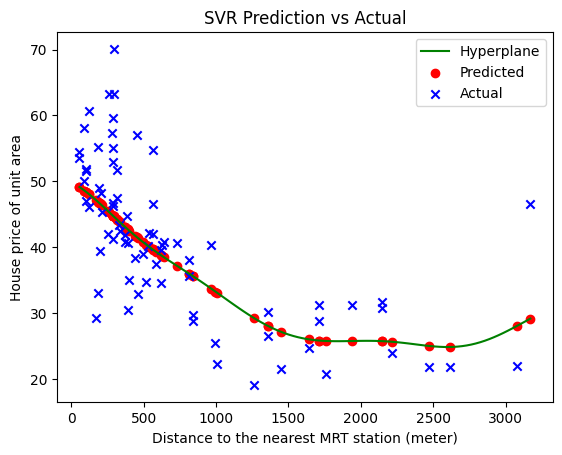

In [23]:
X_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_range_pred = best_svr.predict(scaler.transform(X_range))

plt.plot(X_range, y_range_pred, color='green', label='Hyperplane')
plt.scatter(X_test, y_pred, color='red', label='Predicted', marker='o')
plt.scatter(X_test, y_test, color='blue', label='Actual', marker='x')
plt.xlabel('Distance to the nearest MRT station (meter)')
plt.ylabel('House price of unit area')
plt.title('SVR Prediction vs Actual')
plt.legend()
plt.show()